# Cluster Analysis - KMeans Cluster

## Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('mall-customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.drop('CustomerID', axis=1, inplace=True)

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [43]:
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [44]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [45]:
df.shape

(200, 4)

In [46]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Vizualization

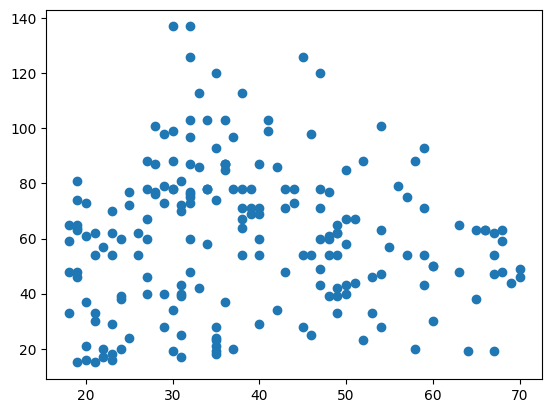

In [10]:
plt.scatter(df.age, df.income)

Text(0.5, 1.0, 'Score and Income Plot')

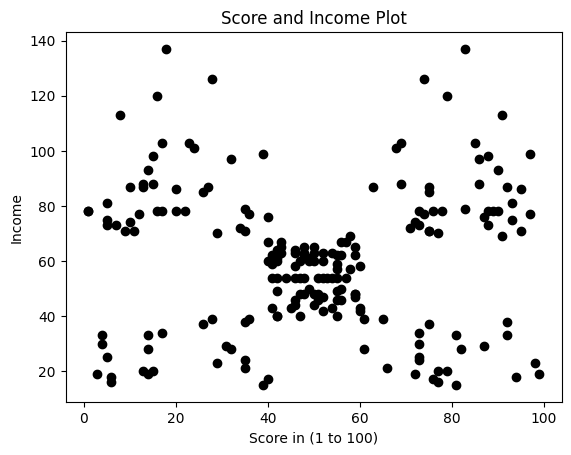

In [11]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Score and Income Plot')

## Pair Plot

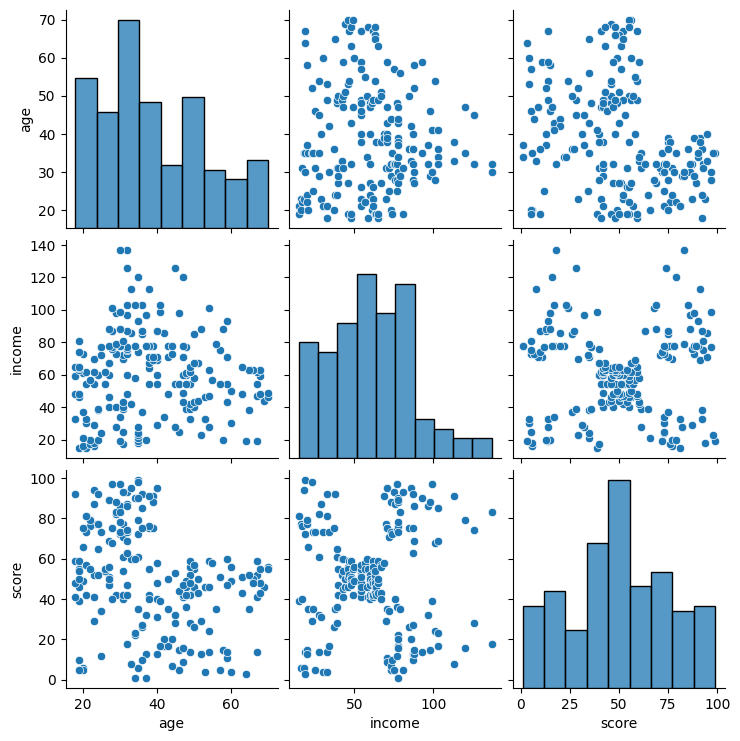

In [12]:
sns.pairplot(df[['age', 'income', 'score']])  

Text(0.5, 1.0, 'Score and Income Plot')

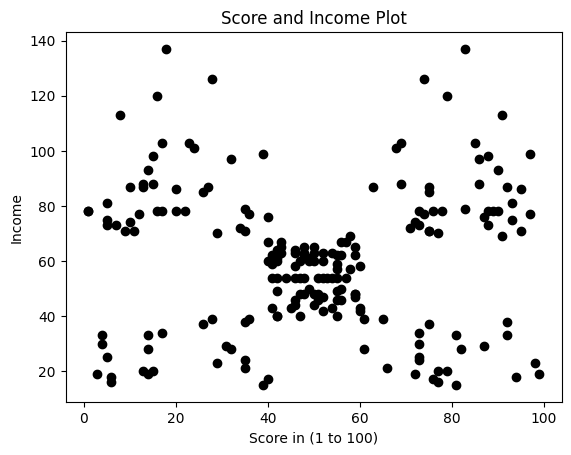

In [13]:
#score and income plot
plt.scatter(df.score, df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Score and Income Plot')

## K-Means Cluster

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=8)

In [16]:
km.fit(df[['score', 'income']])

KMeans()

In [17]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
df['cluster'] = km.predict(df[['score', 'income']])

In [19]:
df.tail()

,gender,age,income,score,cluster
195,Female,35,120,79,0
196,Female,45,126,28,6
197,Male,32,126,74,0
198,Male,32,137,18,6
199,Male,30,137,83,0


## Vizualize Cluster

In [20]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]
df5 = df[df.cluster == 5]
df6 = df[df.cluster == 6]
df7 = df[df.cluster == 7]

In [21]:
df7.shape

(22, 5)

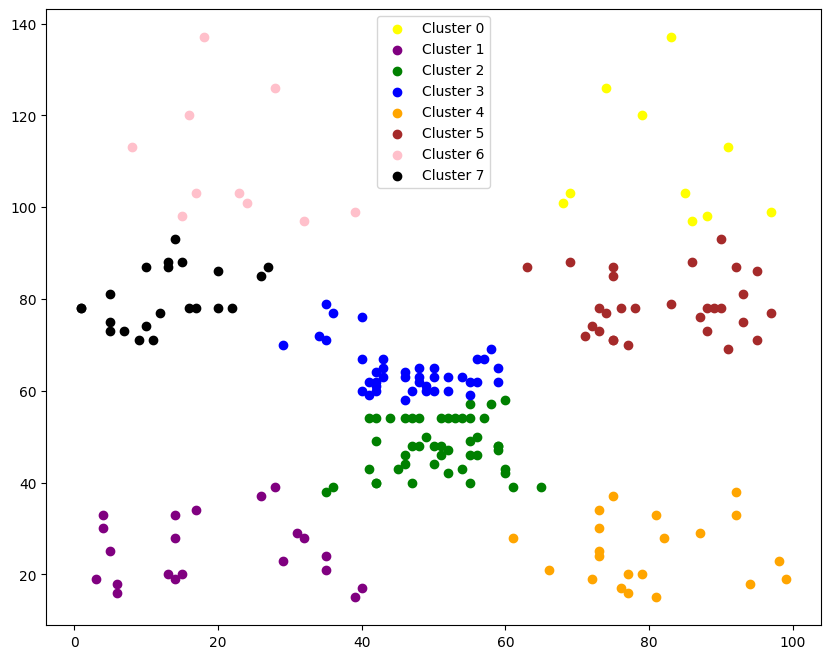

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(df0.score, df0.income, color='yellow', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='purple', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='blue', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='Cluster 4')
plt.scatter(df5.score, df5.income, color='brown', label='Cluster 5')
plt.scatter(df6.score, df6.income, color='pink', label='Cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='Cluster 7')

plt.legend()
plt.show()

In [23]:
center = km.cluster_centers_
center

array([[ 82.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 50.82978723,  47.72340426],
       [ 46.45      ,  64.45      ],
       [ 80.04761905,  25.0952381 ],
       [ 82.17241379,  78.55172414],
       [ 22.        , 109.7       ],
       [ 12.68181818,  80.18181818]])

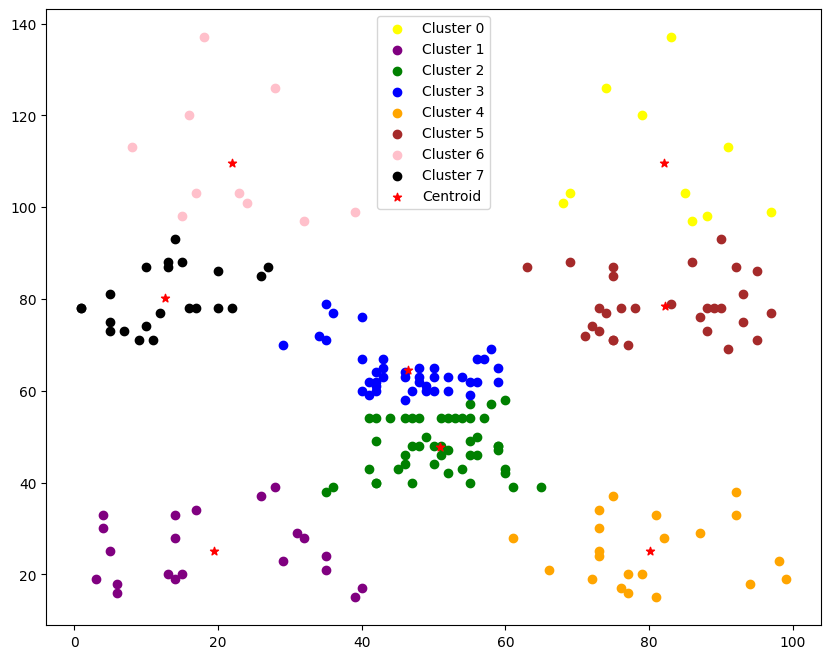

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(df0.score, df0.income, color='yellow', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='purple', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='blue', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='Cluster 4')
plt.scatter(df5.score, df5.income, color='brown', label='Cluster 5')
plt.scatter(df6.score, df6.income, color='pink', label='Cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='Cluster 7')

plt.scatter(center[:, 0], center[:, 1], color='red', marker='*', label='Centroid')
plt.legend()
plt.show()

## Optimizing K

In [25]:
wcss = []
cluster_range = range(1, 15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_)

In [26]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37233.81451071001,
 30552.71402546729,
 25012.91706988548,
 21826.936303231654,
 19742.080965794252,
 18173.917076905364,
 16062.915869607863,
 14641.920712889263,
 12775.343451156688]

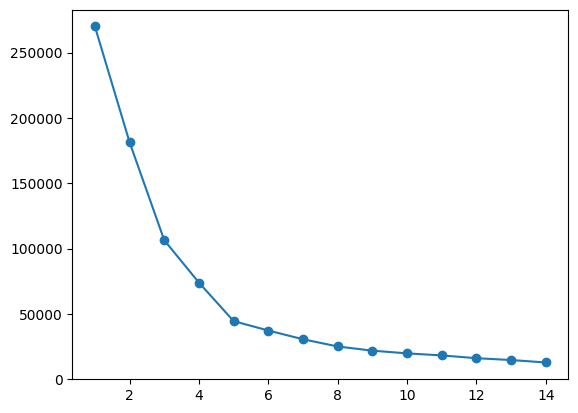

In [27]:
plt.plot(cluster_range, wcss, marker='o')

In [28]:
from kneed import KneeLocator

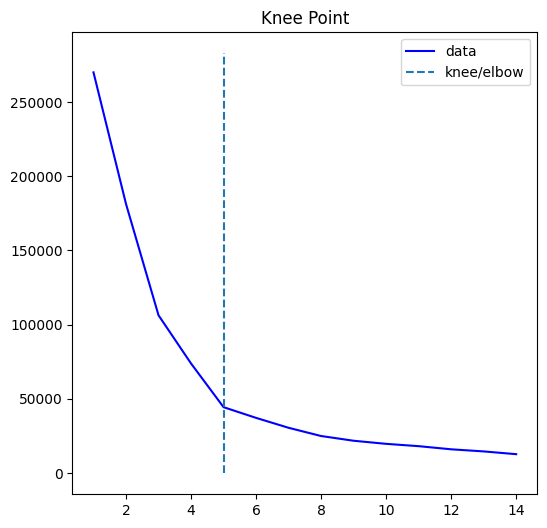

In [29]:
kn = KneeLocator(cluster_range, wcss, direction='decreasing', curve='convex')
kn
kn.plot_knee()

In [30]:
df.head()

,gender,age,income,score,cluster
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


## After Elbow

In [31]:
km = KMeans(n_clusters=5)
km.fit(df[['score', 'income']])

KMeans(n_clusters=5)

In [32]:
df['cluster'] = km.predict(df[['score', 'income']])

In [33]:
df.head()

,gender,age,income,score,cluster
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [34]:
center = km.cluster_centers_
center

array([[20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154]])

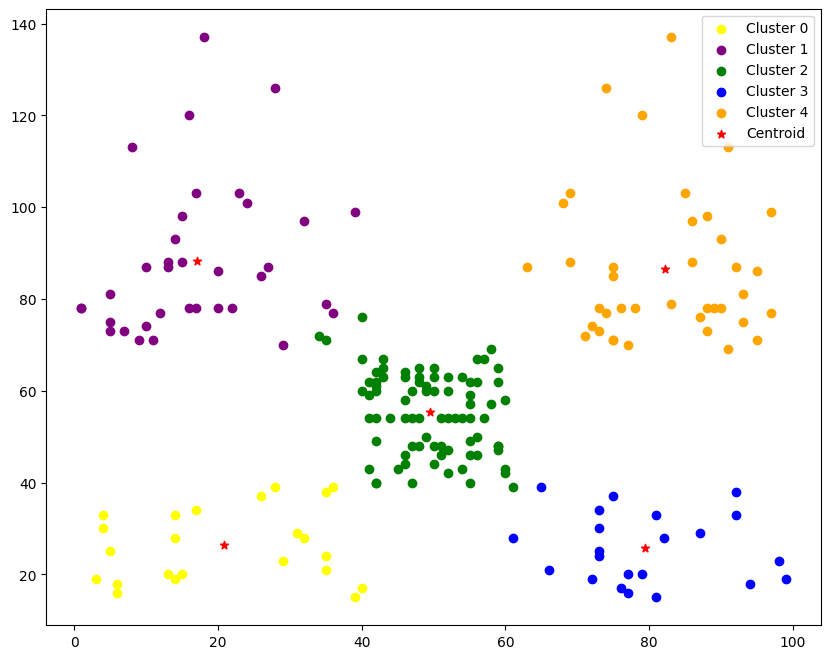

In [35]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]

plt.figure(figsize=(10, 8))
plt.scatter(df0.score, df0.income, color='yellow', label='Cluster 0')
plt.scatter(df1.score, df1.income, color='purple', label='Cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='Cluster 2')
plt.scatter(df3.score, df3.income, color='blue', label='Cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='Cluster 4')

plt.scatter(center[:, 0], center[:, 1], color='red', marker='*', label='Centroid')
plt.legend()
plt.show()

In [36]:
df.head()

,gender,age,income,score,cluster
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


In [37]:
km.predict([[50, 18]])

array([0])